## CNN classifier for the MNIST dataset

In [4]:
#### PACKAGE IMPORTS ####



import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

![MNIST overview image](mnist.png)

#### The MNIST dataset


#### Load and preprocess the data

In [5]:
# Run this cell to load the MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11490434/11490434 [==============================] - 3s 0us/step


First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [6]:
def scale_mnist_data(train_images, test_images):

    return train_images/255.0, test_images/255.0    

In [7]:
# Run function on the input data
scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [8]:
# Add a dummy channel dimension
scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

#### Build the convolutional neural network model




* A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions. Make sure to provide the `input_shape` keyword argument in this first layer.
* A max pooling layer, with a 2x2 window, and default strides.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* Two dense hidden layers, each with 64 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.


In [9]:
def get_model(input_shape):

    model = Sequential()
    model.add(Flatten(input_shape = input_shape))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Softmax())

    return model
    

In [10]:
scaled_train_images[0].shape

(28, 28, 1)

In [11]:
# Run your function to get the model

model = get_model(scaled_train_images[0].shape)

#### Compile the model

You should now compile the model using the `compile` method. To do so, you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy as SCC
from tensorflow.keras.metrics import SparseCategoricalAccuracy as SCA

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [14]:

def compile_model(model):
    model.compile(optimizer = Adam(), loss = SCC(), metrics = [SCA()]) #need to give the () after each three


In [16]:
# Run  function to compile the model
compile_model(model)

#### Fit the model to the training data

Now you should train the model on the MNIST dataset, using the model's `fit` method. Set the training to run for 5 epochs, and return the training history to be used for plotting the learning curves.

In [17]:

def train_model(model, scaled_train_images, train_labels):

    return model.fit(scaled_train_images, train_labels, epochs = 5)
    

In [18]:
# Run function to train the model

history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6379 - sparse_categorical_accuracy: 0.8064
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4659 - sparse_categorical_accuracy: 0.8432
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4351 - sparse_categorical_accuracy: 0.8498
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4172 - sparse_categorical_accuracy: 0.8539
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4049 - sparse_categorical_accuracy: 0.8565


#### Plot the learning curves

* Epoch vs accuracy
* Epoch vs loss


In [19]:
# load the model history into a pandas DataFrame

frame = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

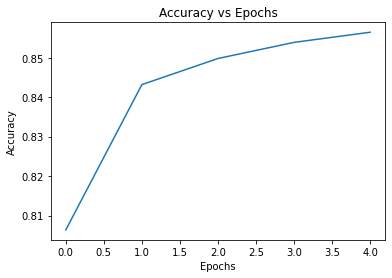

In [20]:
# the Accuracy vs Epochs plot

acc_plot = frame.plot(y="sparse_categorical_accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

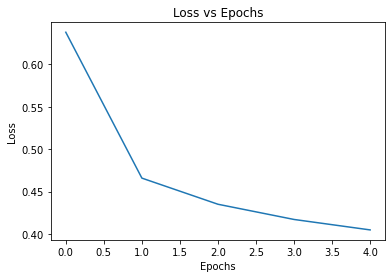

In [21]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluate the model



In [22]:

def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    return model.evaluate(scaled_test_images, test_labels)

In [23]:
# Run your function to evaluate the model

test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.4047 - sparse_categorical_accuracy: 0.8560
Test loss: 0.40466901659965515
Test accuracy: 0.8560000061988831


#### Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each. 

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

1/1 [==============================] - 0s 32ms/step


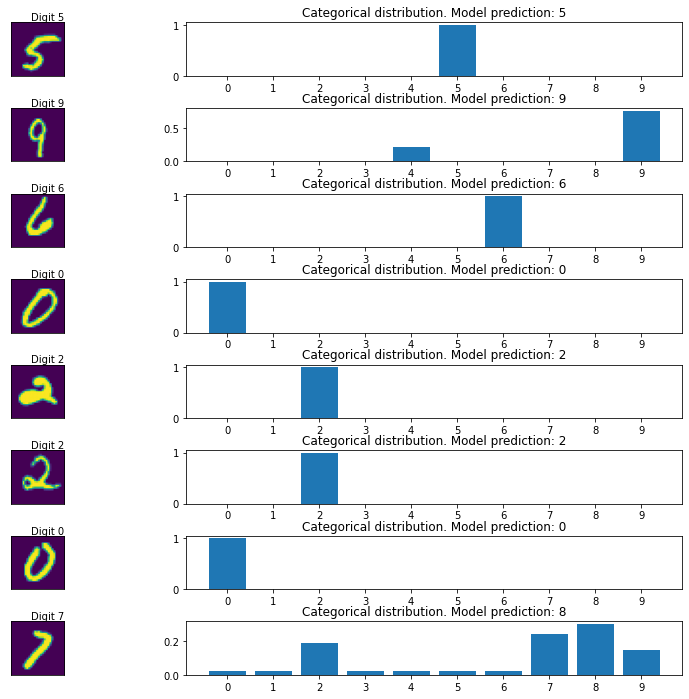

In [27]:
num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 8)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(8, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.6, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()